#### GISC 425 T1 2020
# **LAB ASSIGNMENT 2**

In [1]:
# You need to run this cell to get things setup
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pyplot

import geopandas
import shapely

import math

A key capability of any programming language is iteration over collections of items. 

Before attempting this assignment you need to be up to speed with [iteration](01-iteration.ipynb), [strings](02-strings.ipynb), and [lists](03-lists.ipynb) in Python. These topics are covered in Chapters 7, 8, and 10 of [Think Python](https://greenteapress.com/wp/think-python-2e/). You should already have read these chapters and worked through those notebooks. If you haven't done that, stop reading this notebook and complete those instead. It will also be useful to understand how to open and read files. This is discussed in Chapter 14 of the book, but is also covered in this notebook, before we proceed to the assignment itself. 

## Tissot's indicatrix
This assignment explores this topic using [Tissot's indicatrix](https://en.wikipedia.org/wiki/Tissot's_indicatrix) as an example.

Tissot's indicatrix visualizes the distortions in a project by showing how a circle of equal area appears in that projection across a set of locations.  Here's an example

<img src="Mercator.png" width=50%>

This shows how the Mercator projection exaggerates area at high latitudes. Each circle on the map is the same area on Earth's surface, but those at high latitudes appear considerably larger. Depending on the projection this method also allows us to see how shapes are distorted by a projection.

## Making a geodesic circle
To do this, we are going to need to make equal area circles. I'm calling these `geodesic circles` because these are circles on the surface of a sphere whose radii are measured along the surface of the sphere, not in simple $(x,y)$ coordinates. I have provided code for this below.

In [9]:
# returns a lon-lat point (in degrees) given
# a starting lon-lat and bearing and distance (all in radians)
# equation is from
# https://stackoverflow.com/questions/7222382/get-lat-long-given-current-point-distance-and-bearing
def lon_lat_at_bearing_and_distance(p, b, d):
    lon1 = p[0]
    lat1 = p[1]
    lat2 = math.asin(math.sin(lat1) * math.cos(d) + math.cos(lat1) * math.sin(d) * math.cos(b))
    lon2 = lon1 + math.atan2(math.sin(b) * math.sin(d) * math.cos(lat1), math.cos(d) - math.sin(lat1) * math.sin(lat1))
    # convert result to degrees before returning
    return (math.degrees(lon2), math.degrees(lat2))


# makes a shapely.geometry in lon-lat coordinates
# based on a provide centre point in lon-lat and 
# radius expressed in degrees
def geodesic_circle(p=(0,0), rd=2):
    # extract the numbers and convert to radians
    # assume p is a (lon, lat) tuple in degrees
    ll = (math.radians(p[0]), math.radians(p[1]))
    # convert rd to degrees
    rr = math.radians(rd) 
    
    # empty list for the resulting points
    pts = []
    # 360 in 1 degree steps
    # each time get a point at the distance rr away in that direction
    for bearing in range(360):
        bearing_r = math.radians(bearing)
        pts.append(lon_lat_at_bearing_and_distance(ll, math.radians(bearing), rr))
    return shapely.geometry.Polygon(pts)


Check it works by making some geodesic circles in the cell below.  Since they are `shapely.geometry` objects they will plot. Change the centre point to see how the shape varies when they are plotted in simple longitude-latitude space.

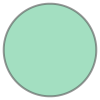

In [10]:
# try setting different center lon-lat coordinates, by
# providing various values for the `p` parameter
geodesic_circle()



## Making a GeoDataFrame from a `list` of geodesic circles
To plot a Tissot's indicatrix we will make a `GeoDataFrame` from a `list` of circles, and plot them on top of a map of the world. Below is a function to make a `GeoDataFrame` from a list of `geodesic_circle`s. To show how this works, I'll just make a small list so you can see the idea.

In [11]:
def make_gdf_from_circles(circles):
    gs = geopandas.GeoSeries(circles)
    gdf = geopandas.GeoDataFrame(geometry=gs)
    gdf.crs = "EPSG:4326"
    return gdf

Here's some code to make a `GeoDataFrame` from a list of circles using this function.

In [12]:
circle_list = [geodesic_circle(), 
               geodesic_circle(p=(0,30)), 
               geodesic_circle(p=(0,60))
              ]
tissot = make_gdf_from_circles(circle_list)

And finally, here's how we can make a visualization. First grab the built in world dataset:

In [13]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

And now assemble the map

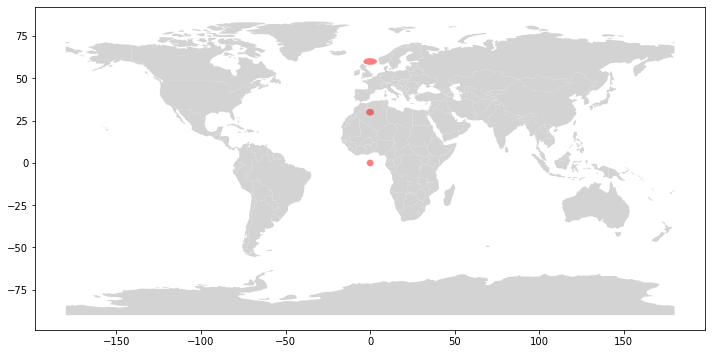

In [14]:
fig = pyplot.figure(figsize=(12,6))
base = fig.add_subplot(111)

world.plot(ax=base, facecolor='lightgrey')
tissot.plot(ax=base, facecolor='r', alpha=0.5)

This is obviously not a very useful example, because it only shows three circles. That is the point of the assignment, to make more extensive lists that will assist in the visualization.

## Here's one I prepared earlier
The first approach to this will make use of a list of centres that I made using a package in *R* called [`dggridR` which implements discrete global grids](https://github.com/r-barnes/dggridR).  I have output the resulting equally space grid centres to a CSV file `cc.csv`.

Reading this file gives us a chance to learn about opening and reading files in Python.  This is surprisingly easy.

In [15]:
# The open() function opens the specified file for reading
cc_file = open("cc.csv")
# The readlines() method reads the file contents into a variable
data = cc_file.readlines()

# now we have the data we should close the file
cc_file.close()

# take a look at the first few items in the list (note the slice operation)
data[:10]

['"lon_deg","lat_deg"\n',
 '-168.749999996585,-86.3874557703184\n',
 '-168.749999998796,-79.1899781185295\n',
 '164.473671061158,-73.8495458967467\n',
 '-168.749999999191,-72.0740681026242\n',
 '171.565748305498,-67.4252297651009\n',
 '-168.749999999325,-65.0900301562663\n',
 '178.315713417607,-59.7585569130794\n',
 '-175.334431060727,-52.5833589753758\n',
 '179.516400763834,-46.4466190835229\n']

## **The first part of the assignment is in this section**
So now we have the list of circle centres. They are in a list (which means we can read through them, *but* it is a list of strings, and the strings also have a `\n` newline character at the end. To make the list of circles we need, we'll have to read through this list of strings, and parse each one into a pair of coordinates to be passed to the `geodesic_circle` function.

The comments in the cell below guide you through how to do this.

You should complete the cell to make a list of `geodesic_circle`s.

In [16]:
txt = "welcome,jungle"

x = txt.split(",")

print(x)


['welcome', 'jungle']


In [17]:
c=[]
""


''

In [23]:
# first make an empty list for the circles
# call it something appropriate

circle=[]

# loop through the data read from the file using a for operation
# you can skip the first line with a slice operation

for i in data[1:]:
    coordinates= i[:-1]
    line=coordinates.split(",")
    long=float(line[0])
    lat=float(line[1])
    lists=geodesic_circle([long, lat])
    print(lists)
    circle.append(lists)
    #print(circle)

# inside the loop, with each line of the data
# you need to remove the last character (the newline character)

# then you need to split the line into two strings at the ',' separator

# then you should have a list of two items, the lon and lat, as strings
# you need to convert these to float values and then pass them into
# the geodesic_circle function as the p parameter

# then append the resulting geodesic_circle to the list of circles




POLYGON ((-168.749999996585 -84.38745577031841, -168.095790091327 -84.3876519813703, -167.441949908202 -84.38824059578135, -166.7888483236403 -84.38922155731674, -166.1368525279899 -84.39059477224733, -165.4863271957263 -84.39236010934354, -164.8376336713893 -84.39451739986671, -164.1911291762093 -84.3970664375575, -163.547166040146 -84.40000697862193, -162.9060909637804 -84.40333874171483, -162.268244314166 -84.40706140792031, -161.6339594583752 -84.41117462073021, -161.0035621380732 -84.41567798601838, -160.377369888019 -84.42057107201362, -159.7556915009435 -84.42585340926854, -159.1388265407933 -84.43152449062575, -158.527064905859 -84.43758377118087, -157.9206864428416 -84.44403066824209, -157.3199606124543 -84.45086456128658, -156.7251462067105 -84.45808479191311, -156.1364911176272 -84.46569066379114, -155.5542321566717 -84.47368144260589, -154.9785949239094 -84.48205635599972, -154.4097937254685 -84.49081459350903, -153.8480315376365 -84.49995530649701, -153.2935000156282 -84.5

POLYGON ((-158.94411211973 35.81714964030819, -158.9020709659245 35.81683760821156, -158.8600426635062 35.81590161432633, -158.8180400598233 35.81434196582491, -158.7760759941477 35.81215917452277, -158.7341632936407 35.8093539566707, -158.6923147693235 35.80592723266414, -158.6505432120538 35.80188012666991, -158.6088613885107 35.79721396617047, -158.5672820371883 35.79193028142608, -158.5258178644011 35.78603080485531, -158.4844815403009 35.77951747033422, -158.4432856949082 35.77239241241478, -158.4022429141593 35.76465796546314, -158.3613657359704 35.75631666271816, -158.320666646319 35.74737123527106, -158.2801580753473 35.73782461096695, -158.2398523934851 35.72767991322856, -158.1997619075962 35.71694045980374, -158.1598988571499 35.70560976143683, -158.1202754104165 35.6936915204653, -158.0809036606908 35.6811896293426, -158.0417956225438 35.66810816908786, -158.002963228104 35.65445140766391, -157.9644183233692 35.64022379828462, -157.9261726645513 35.62542997765242, -157.8882

POLYGON ((-134.262384586712 46.529621960923, -134.2133732439758 46.52930638775582, -134.1643769022549 46.52835977537951, -134.115410557798 46.52678244512128, -134.0664891973227 46.52457493236481, -134.0176277932547 46.52173798630777, -133.9688412989738 46.51827256962287, -133.9201446440665 46.51417985802237, -133.8715527295898 46.50946123972665, -133.8230804233461 46.50411831483731, -133.7747425551728 46.49815289461518, -133.7265539122467 46.49156700066403, -133.6785292344066 46.48436286402055, -133.6306832094959 46.47654292415156, -133.5830304687258 46.46810982785902, -133.535585582063 46.4590664280941, -133.4883630536415 46.44941578268106, -133.4413773172018 46.43916115295215, -133.3946427315597 46.42830600229464, -133.348173576104 46.41685399461122, -133.3019840463279 46.404808992695, -133.256088249394 46.39217505652051, -133.2105001997341 46.37895644145215, -133.1652338146876 46.36515759637135, -133.1203029101773 46.35078316172433, -133.0757211964267 46.33583796749159, -133.0315022

POLYGON ((-114.493265111406 -21.92009706770961, -114.4550606161841 -21.9203971533476, -114.416867792375 -21.92129732264676, -114.3786983077433 -21.92279731278548, -114.3405638227577 -21.92489668580367, -114.3024759869471 -21.92759482871684, -114.2644464352604 -21.93089095367556, -114.226486784431 -21.93478409817057, -114.1886086293499 -21.9392731252833, -114.1508235394447 -21.94435672398195, -114.1131430550704 -21.95003340946286, -114.0755786839091 -21.95630152353731, -114.0381418973832 -21.96315923506349, -114.0008441270815 -21.97060454042381, -113.9636967612003 -21.97863526404713, -113.9267111410004 -21.98724905897624, -113.8898985572816 -21.99644340747999, -113.8532702468761 -22.00621562171051, -113.8168373891617 -22.01656284440485, -113.7806111025952 -22.02748204963146, -113.74460244127 -22.03897004358088, -113.7088223914956 -22.05102346540091, -113.673281868403 -22.06363878807577, -113.6379917125748 -22.07681231934947, -113.6029626867041 -22.09054020269278, -113.5682054722795 -22.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Now you have a list of circles, make a `GeoDataFrame` from it using the `make_gdf_from_circles()` function.

In [10]:
# Put a line of code here to make a GeoDataFrame from your list of circles

geo_circle=make_gdf_from_circles(circle)
print(geo_circle)

                                              geometry
0    POLYGON ((-168.750 -84.387, -168.096 -84.388, ...
1    POLYGON ((-168.750 -77.190, -168.561 -77.190, ...
2    POLYGON ((164.474 -71.850, 164.600 -71.850, 16...
3    POLYGON ((-168.750 -70.074, -168.636 -70.074, ...
4    POLYGON ((171.566 -65.425, 171.657 -65.426, 17...
..                                                 ...
807  POLYGON ((175.357 42.005, 175.403 42.005, 175....
808  POLYGON ((174.612 -18.599, 174.649 -18.600, 17...
809  POLYGON ((174.612 22.599, 174.649 22.599, 174....
810  POLYGON ((176.754 -5.199, 176.790 -5.199, 176....
811  POLYGON ((176.754 9.199, 176.790 9.199, 176.82...

[812 rows x 1 columns]


And now make a plot, using the code from a cell that we ran a while back (copy and paste it into the cell below, and modify as required.

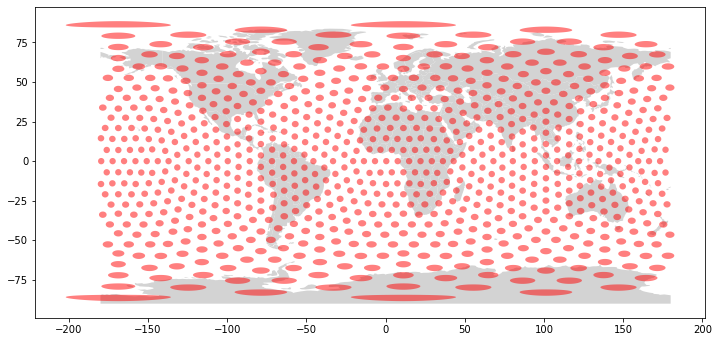

In [11]:
# Copy and paste code from a cell above to make the map, 
# but using the GeoDataFrame of circles you made

fig = pyplot.figure(figsize=(12,6))
base = fig.add_subplot(111)

world.plot(ax=base, facecolor='lightgrey')
geo_circle.plot(ax=base, facecolor='r', alpha=0.5)


## **The second part of the assignment is in this section**
Most Tissot indicatrix visualizations make use of a longitude-latitude grid of locations.

This will involve nested loops, which will be a good test of your understanding of iteration.

Again you will need to start with an empty list.

This time you will need two nested loops, one stepping through a series of longitude values, and the inner one stepping through a series of latitude values. It's a good idea to avoid longitude -180 or +180  and latitude -90 or +90 so consider that.

Also worth noting are the additional options you can pass to `range()`.  Just to give you the idea:

In [3]:
for x in range(10, 100rf, 20):
    print(x)

10
30
50
70
90
110


This should enable you to make outer and inner `for` loops that generate a suitable set of longitude and latitude values to generate `geodesic_circle`s to `append` to the empty `list` in the same way you did in the previous step.

Write code in the cell below.

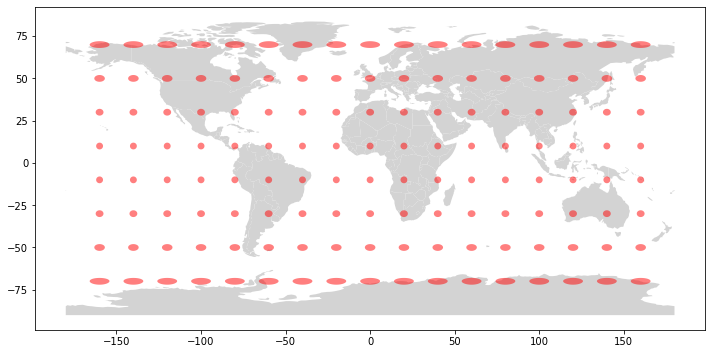

In [13]:
# Make an empty list for the circles

circle_2= []

# Use nested for loops and the range operation to make a series of circles

for long_2 in range(-160,180,20):
    for lat_2 in range(-70,90,20): 
        lists_2=geodesic_circle([long_2, lat_2])
        circle_2.append(lists_2) # arranged in a longitude - latitude grid, appending them to the list each time

# then use make_gdf_from_circles() to make GeoDataFrame from your list of circles
geo_circle_2=make_gdf_from_circles(circle_2)

# then use the code you used before to make a map
fig = pyplot.figure(figsize=(12,6))
base = fig.add_subplot(111)

world.plot(ax=base, facecolor='lightgrey')
geo_circle_2.plot(ax=base, facecolor='r', alpha=0.5)


## Submission
Save a completed notebook with a name that includes your name. Upload to the dropbox provided on blackboard.

In the cell below you can provide any commentary you would like.